<a href="https://colab.research.google.com/github/Monferium/APM1210/blob/main/1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:coral">Teenage Phone Addiction Dataset: Exploratory Data Analysis & Visualizations</h1>
<hr>

This section sets the tone for the entire analysis by introducing the teenage phone addiction dataset and clarifying the goals of the exploratory data analysis (EDA). It reminds us why this dataset matters: teenage years are a critical developmental period, and the way young people use their phones can have profound effects on sleep, social relationships, academic outcomes, and mental health.

**Setting up this notebook as a structured EDA not only shows a commitment to thoroughness but also signals to the reader that the findings here will build a foundation for more advanced modeling later. The implications of beginning this way are simple but powerful: when we frame the question clearly, we can better align our interpretations with what the data truly say about teenagers’ lived experiences.**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

df = pd.read_csv("/content/sample_data/teen_phone_addiction_dataset.csv")

# FROM 2300 original observations, we establish CLUSTERING by teenager's ages (13, 14, ..., 19) and the STATIFYING its first 30 samples
    #CLUSTER STRATIFIED TECHNIQUE
df_sampled = df.groupby('Age').apply(lambda x: x.sample(n=min(30, len(x)), random_state=42)).reset_index(drop=True)

df_sampled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      210 non-null    int64  
 1   Name                    210 non-null    object 
 2   Age                     210 non-null    int64  
 3   Gender                  210 non-null    object 
 4   Location                210 non-null    object 
 5   School_Grade            210 non-null    object 
 6   Daily_Usage_Hours       210 non-null    float64
 7   Sleep_Hours             210 non-null    float64
 8   Academic_Performance    210 non-null    int64  
 9   Social_Interactions     210 non-null    int64  
 10  Exercise_Hours          210 non-null    float64
 11  Anxiety_Level           210 non-null    int64  
 12  Depression_Level        210 non-null    int64  
 13  Self_Esteem             210 non-null    int64  
 14  Parental_Control        210 non-null    in

/tmp/ipython-input-37-1023475842.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Age').apply(lambda x: x.sample(n=min(30, len(x)), random_state=42)).reset_index(drop=True)


<h3>Data Structure Overview</h3>
<hr>

**This step embodies the transition from collection to comprehension, and signals readiness to treat the data with care.**

**Most of the features are safe to assume discrete and continuous data (int64 and float64 data types) respectively**

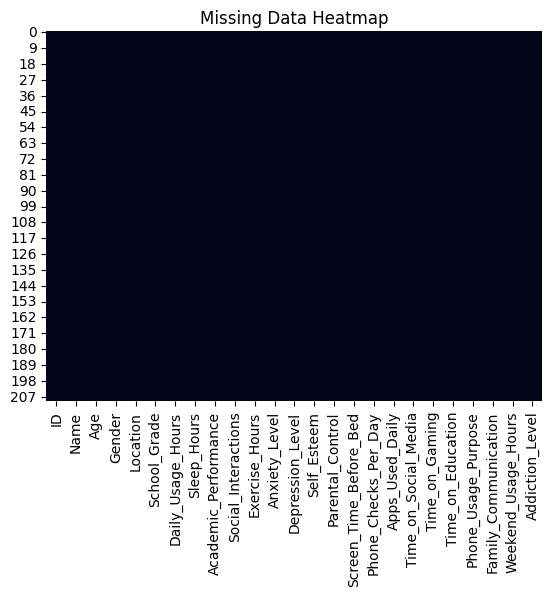

In [38]:
sns.heatmap(df_sampled.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

<h3>Data is Complete</h3>
<hr>


**The heatmap output here provides immediate reassurance: the dataset is remarkably complete. We don’t see glaring holes or systemic patterns of missingness, which means we can proceed confidently without worrying about bias from imputed or absent data. This completeness also reflects well on whoever collected the data — and for us, it removes a common barrier to clear interpretation. The practical implication is that the results we see later on are less likely to be artifacts of patching over gaps, and more likely to reflect actual behaviors and outcomes.**

All continuous variables: ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Self_Esteem', 'Academic_Performance', 'ID', 'Age', 'Social_Interactions', 'Anxiety_Level', 'Depression_Level', 'Parental_Control', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Family_Communication']


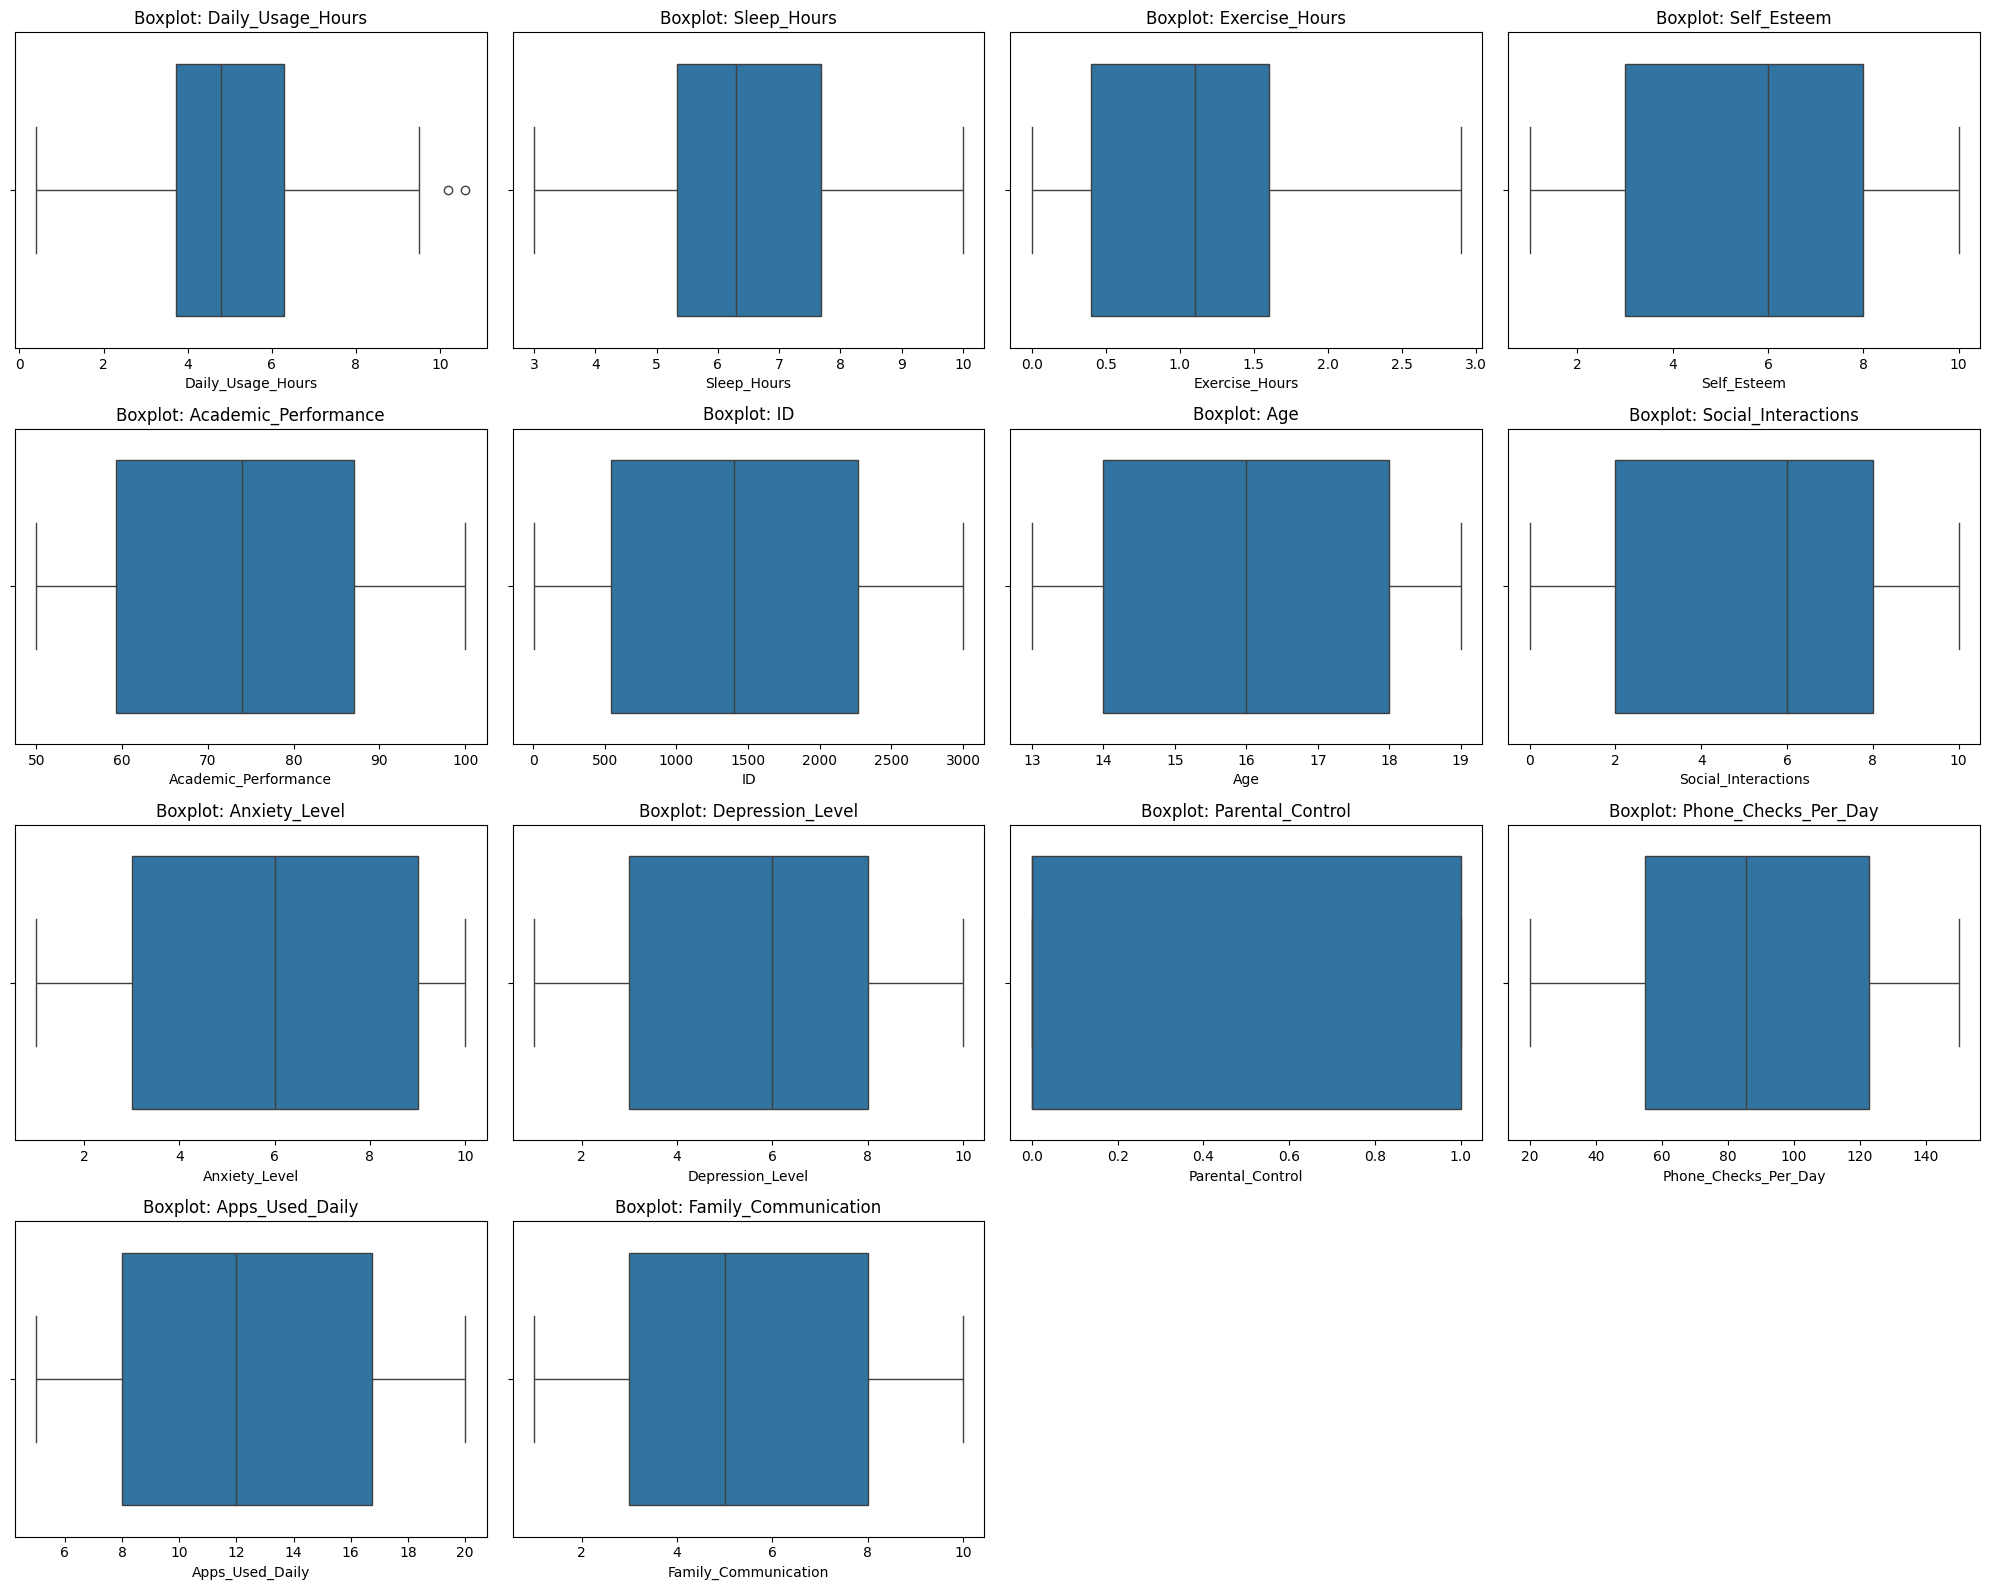

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns explicitly considered continuous originally
original_floats = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Self_Esteem', 'Academic_Performance']

# Detect all int64 columns
int_columns = df_sampled.select_dtypes(include='int64').columns.tolist()

# Convert int64 to float
df_sampled[int_columns] = df_sampled[int_columns].astype(float)

# Combine both sets
all_continuous = original_floats + int_columns

# Remove duplicates just in case
all_continuous = list(dict.fromkeys(all_continuous))

print(f"All continuous variables: {all_continuous}")

# Define grid layout
n_cols = 4  # 4 plots per row
n_rows = (len(all_continuous) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(all_continuous):
    sns.boxplot(x=df_sampled[var], ax=axes[i])
    axes[i].set_title(f"Boxplot: {var}")
    axes[i].set_xlabel(var)

# Turn off empty subplots if grid is bigger than needed
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<h3>Most Features are neither Uniform nor Normal (Part 1)</h3>
<hr>

1. We see, for instance, that **daily phone usage hovers around four to six hours for most, a figure that already feels substantial. Yet, there are teens whose usage spikes past 10 hours a day — clear outliers who may be struggling to set boundaries with their devices.** This contrast already hints at the possibility that while many keep their phone use manageable, a vulnerable few may lean on it excessively, perhaps at the expense of other aspects of their lives.

2. When we turn **to sleep, the median sits around six to seven hours per night — slightly shy of the recommended eight hours for healthy adolescent development. Here, too, some teens fall far below even this modest benchmark**, suggesting that late-night scrolling or messaging could be chipping away at their rest. This echoes concerns often raised by parents and educators alike: that phones, particularly when brought into the bedroom, disrupt much-needed sleep and leave teens depleted.

3. **Exercise levels paint a particularly stark picture, with most clustered at less than two or three hours per week of physical activity. The boxplot is compressed, showing how sedentary habits have become the norm rather than the exception.** While perhaps unsurprising in today’s digital world, it raises important questions about long-term health and wellbeing, especially when paired with high screen time.

4. **Self-esteem and academic performance tend to center around middle-to-high values, which is encouraging at first glance. Yet the presence of teens scoring at the lower end of these measures cannot be ignored.** For them, overuse of phones could very well be entangled with struggles in school and with self-image — a potential red flag for targeted support.

5. On the social side, the boxplots reveal a wide spread in social interactions and family communication. **Some teens are highly engaged with peers and family, while others seem withdrawn or disconnected. It suggests that while technology may facilitate connection for some, it might also exacerbate isolation for others** — depending on how it’s used and the dynamics at home.

6. The mental health indicators — **anxiety and depression levels — appear fairly uniform, lacking a strong clustering at any one extreme. This points to a complex landscape: mental health challenges are clearly present, but they manifest differently across individuals** and likely stem from a mix of factors beyond just phone usage.

7. Finally, **phone-checking frequency and the number of apps used daily rise steadily, with a few clear outliers who seem deeply immersed in their devices. This degree of engagement suggests that for some teens, phones have become more than just a tool** — they are a constant companion.

8. Interestingly, **parental control shows a sharp polarization: most teens report either high levels of parental oversight or very little at all. This speaks volumes about parenting styles** in this sample — and may also influence how teens navigate their own boundaries with technology.

Sturges’ bins for n=210: 9


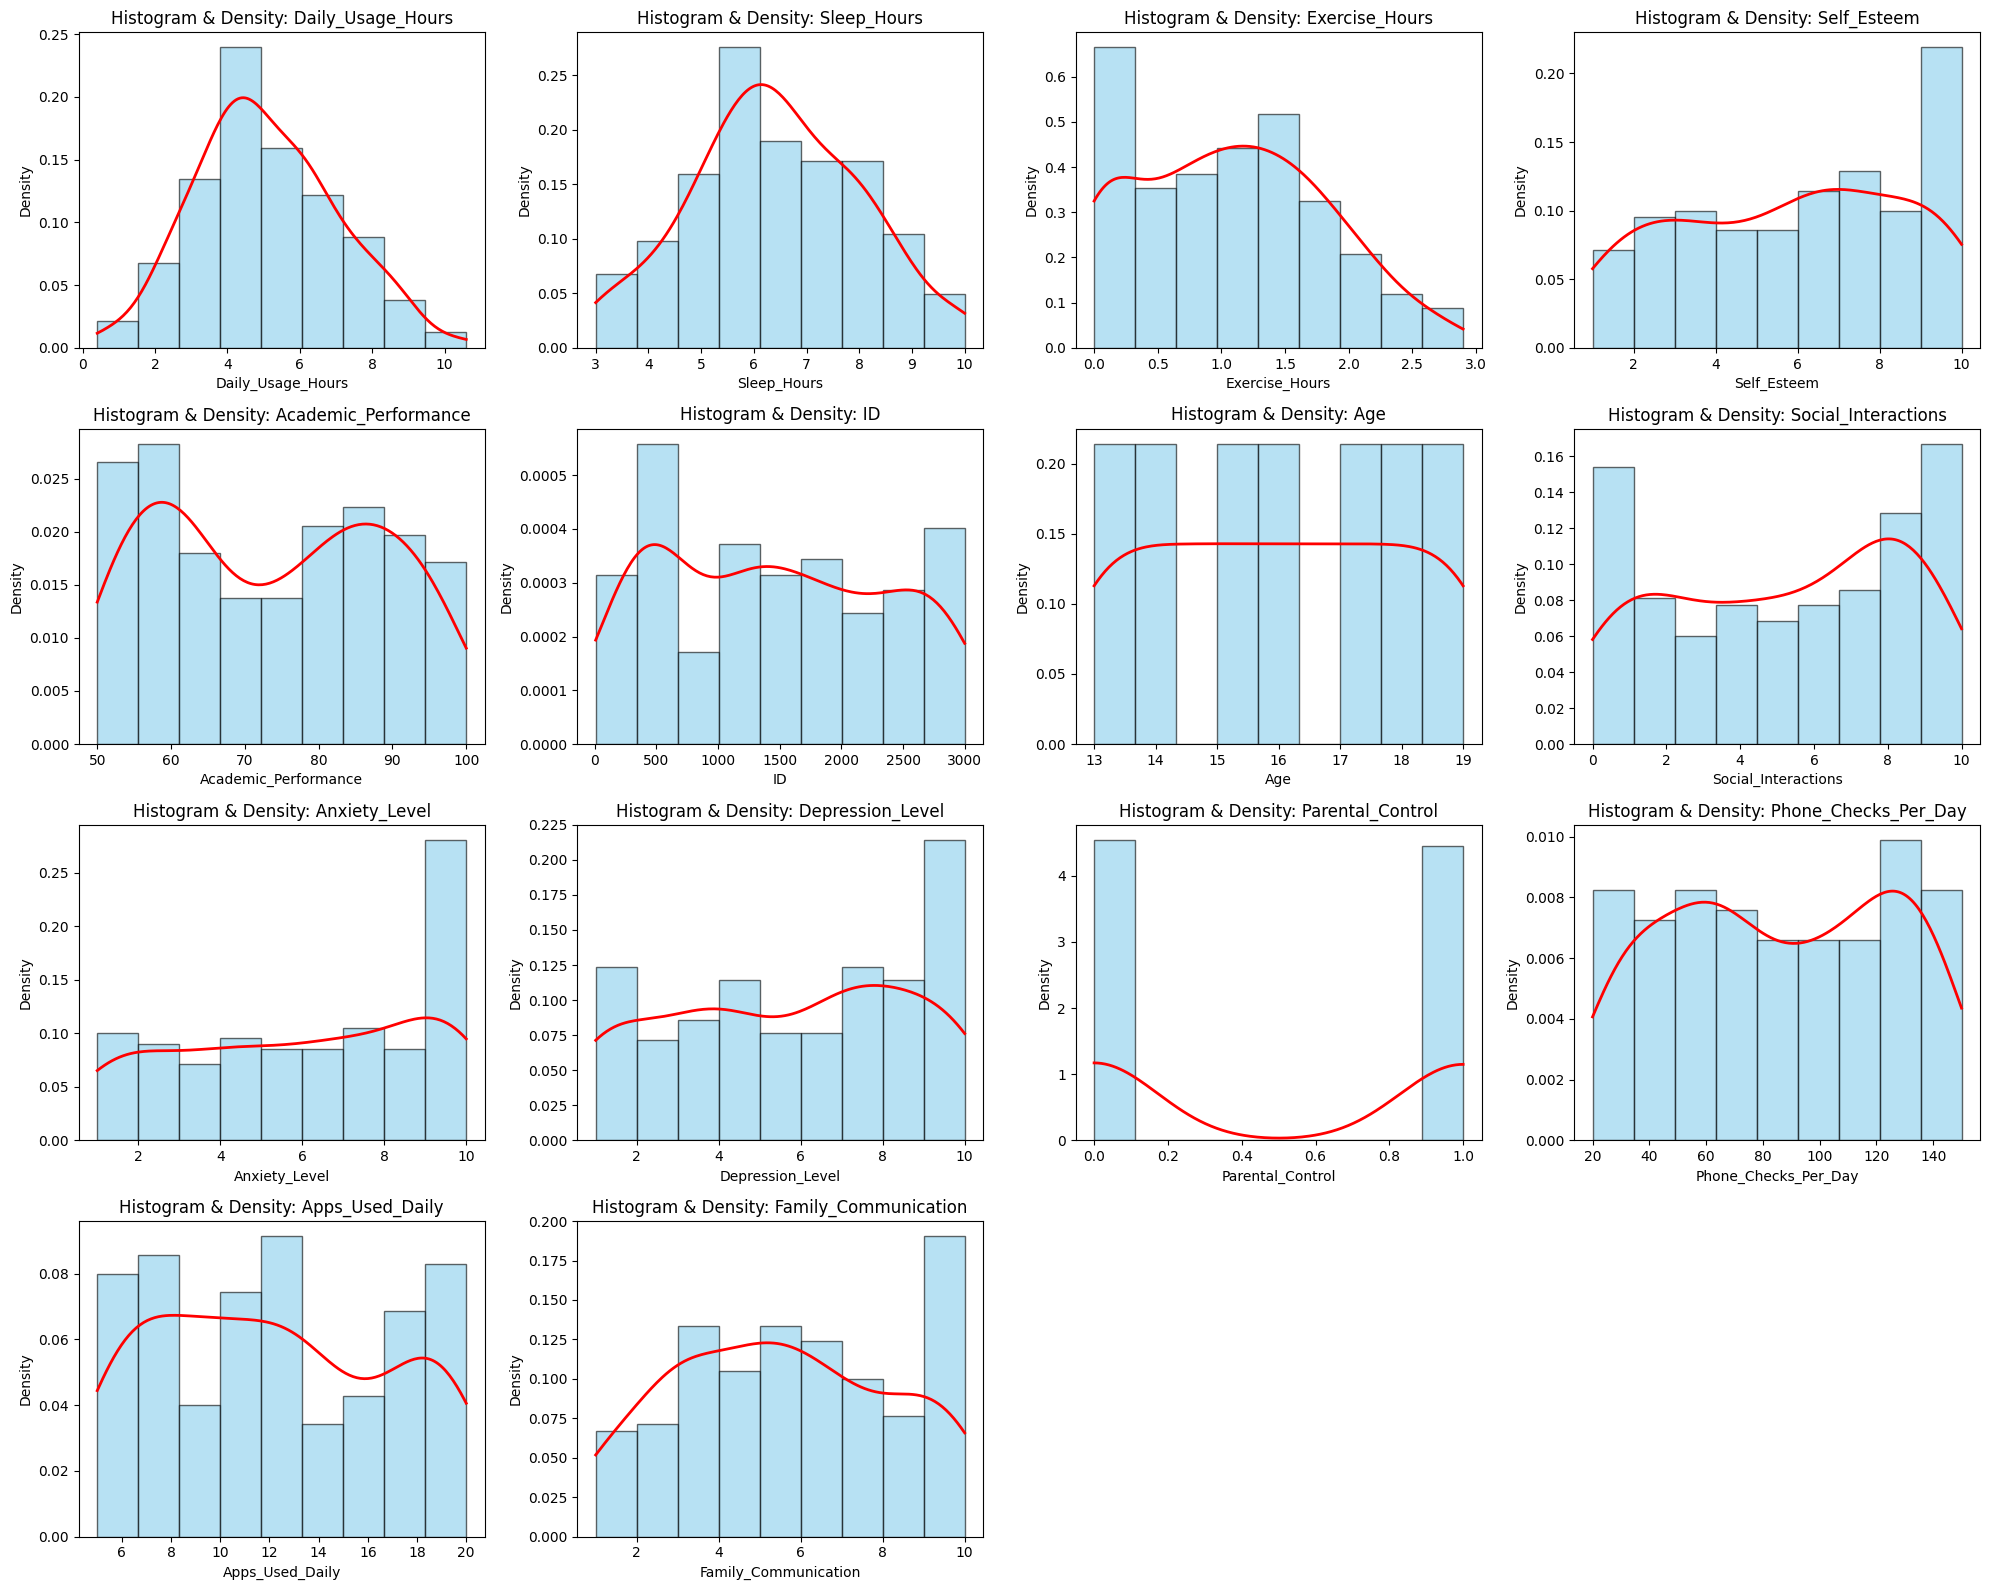

In [40]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

# Same grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

n = len(df_sampled)

# Sturges’ rule
sturges_bins = int(np.ceil(np.log2(n) + 1))
print(f"Sturges’ bins for n={n}: {sturges_bins}")

for i, var in enumerate(all_continuous):
    data = df_sampled[var].dropna()

    # Plot histogram
    axes[i].hist(data, bins=sturges_bins, color='skyblue', edgecolor='black', alpha=0.6, density=True)

    # Estimate density
    density = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    density_vals = density(x_vals)

    # Plot density line
    axes[i].plot(x_vals, density_vals, color='red', linewidth=2)

    axes[i].set_title(f"Histogram & Density: {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Density")

# Turn off empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<h3>Most Features are neither Uniform nor Normal (Part 2)</h3>
<hr>

**The histograms (Using Sturges' Rule) - after boxplots - deepen our understanding of teenage behaviors by not only showing central tendencies, but also by uncovering the full shapes of the distributions** — nuances that boxplots alone cannot fully capture. They reveal that while many variables appear moderate on average, the extremes and the subtler patterns tell a more layered story.

1. **For Daily Usage Hours and Sleep Hours, we see distributions that are roughly normal, peaking at moderate values but with tails that extend toward excessive use or inadequate sleep.** This symmetry supports the earlier boxplot insight that most teens are clustered around typical behaviors, yet **the histograms make clear just how far a small group deviates — particularly those who use their phones heavily into the night, reducing their sleep further.**

2. **The Exercise Hours histogram starkly shows left skewness — reinforcing the concern that inactivity is pervasive among teens**, with few achieving healthy levels of exercise. This detail was hinted at in the boxplots but is more pronounced here, emphasizing just how sedentary the majority has become.

3. **For Self-Esteem and Academic Performance, the histograms reveal a subtle bimodal tendency, suggesting that these aren’t just evenly distributed — but rather split into groups who are thriving and groups who are struggling**. This bimodality wasn’t apparent in the earlier boxplots, and it highlights a potential polarization in outcomes, possibly tied to differing levels of phone use and coping strategies.

4. **Social Interactions and Family Communication appear flatter and more evenly spread in the histograms, suggesting that these social metrics vary widely**. Some teens are deeply engaged with family and peers, while others are isolated — indicating that social experiences are diverse and likely influenced by more than just phone behavior.

5. The histograms also provide richer insight into mental health: **Anxiety and Depression Levels are broadly spread, confirming that these challenges are significant and not concentrated only in extreme outliers. The uniform spread hints that mental health struggles may be more pervasive and nuanced** than a boxplot could illustrate.

6. For **Phone Checks Per Day and Apps Used Daily, the right-skewed distributions bring out the prevalence of moderate phone engagement, but they also unmask a small group of hyper-connected teens who check their phones compulsively and juggle numerous apps** — suggesting potential for unhealthy attachment to devices.

8. **Perhaps the most striking revelation comes from Parental Control, which shows a clear U-shape. Many teens either experience strict oversight or virtually none, with few in a balanced middle ground. This bimodality was subtle in the boxplot but becomes undeniable in the histogram**, underscoring the polarization of parenting approaches and their possible impact on teen autonomy and habits.

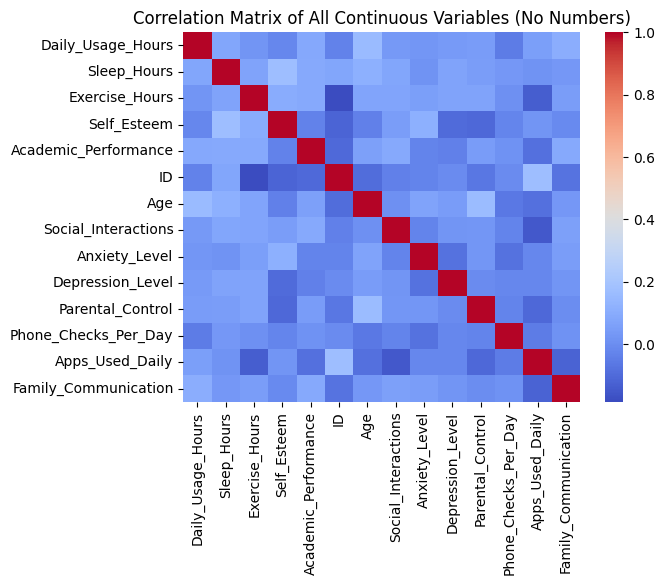

In [41]:
# Correlation Matrix
corr = df_sampled[all_continuous].corr()

sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of All Continuous Variables")
plt.show()

<h3>The Data has neglible multicollinearity</h3>
<hr>

The heatmap is very useful here. If you see a pair of predictors with correlation ≈ ±0.6, that would violate this assumption.
Here, since most off-diagonal correlations are weak-to-moderate (bluish), this suggests multicollinearity is likely not severe.


**Thus, this step sets up targeted hypotheses for later stages — for example, is it worth testing interventions that aim to reduce nightly phone checks to improve sleep?**

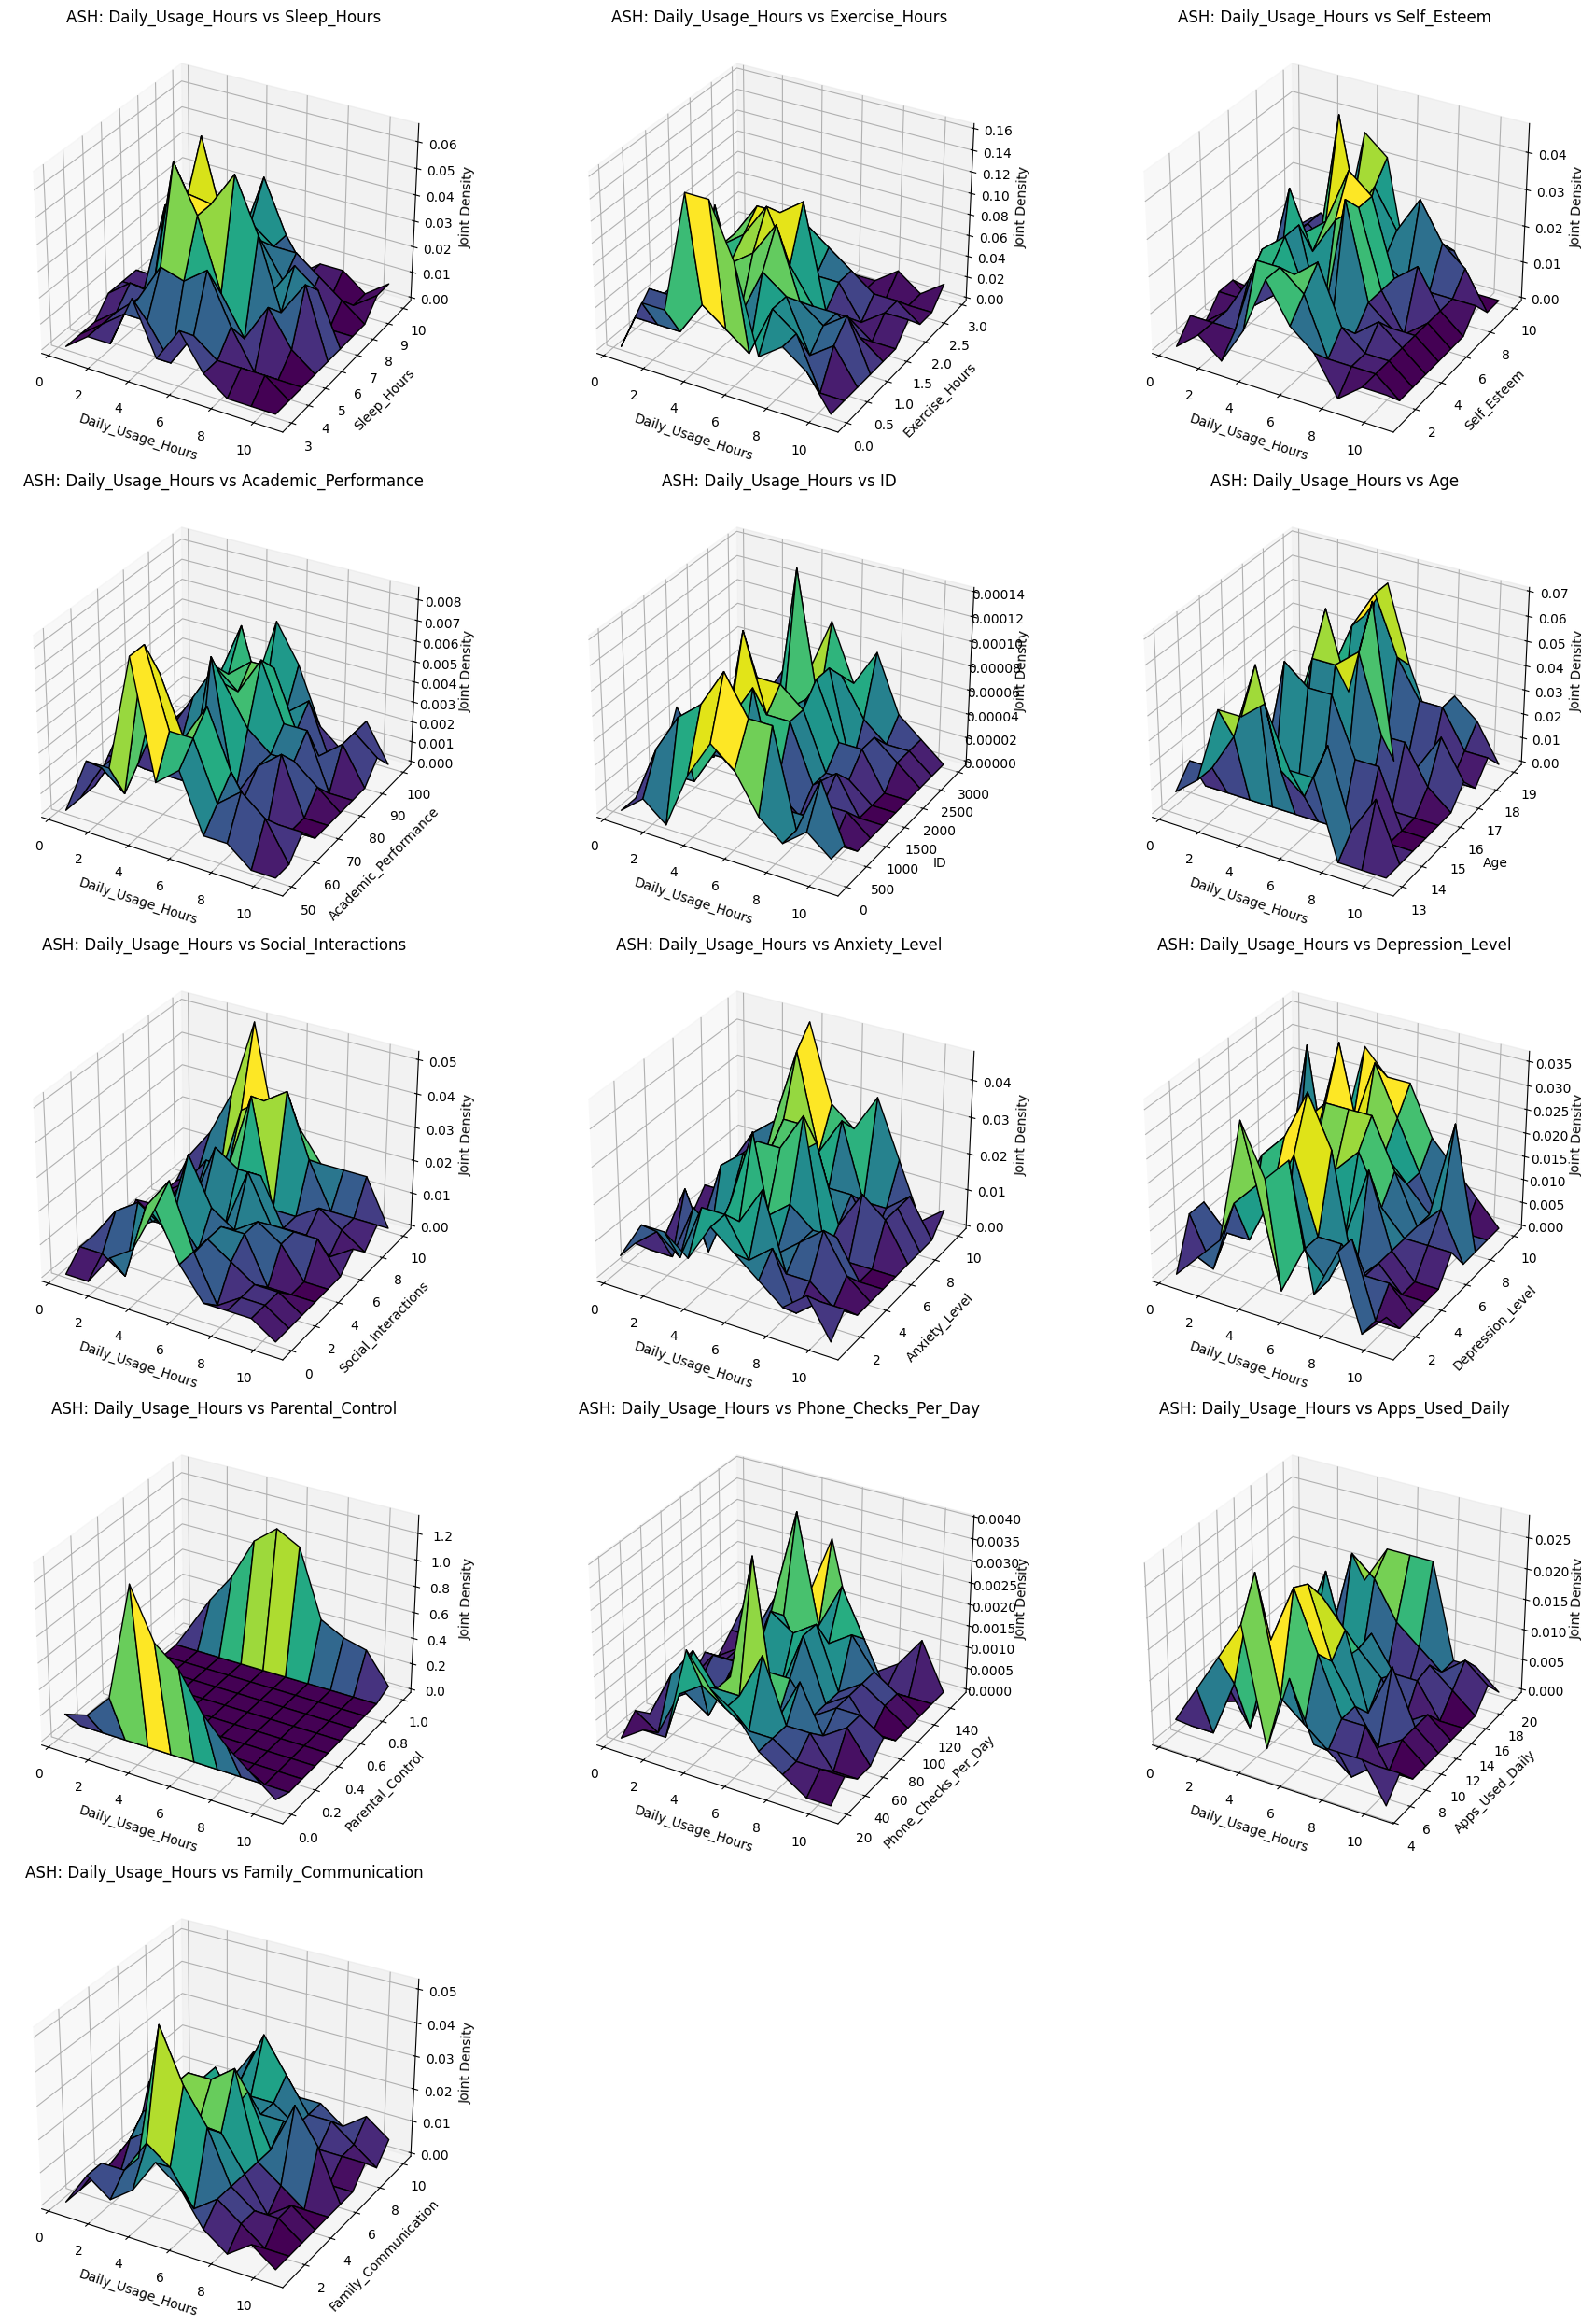

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define ASH function
def compute_ash(x, y, bins=10, shifts=5):
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    x_grid = np.linspace(xmin, xmax, bins)
    y_grid = np.linspace(ymin, ymax, bins)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = np.zeros_like(X)

    shift_amount = 1.0 / shifts

    for i in range(shifts):
        for j in range(shifts):
            x_shifted = x + i * shift_amount * (xmax - xmin) / bins
            y_shifted = y + j * shift_amount * (ymax - ymin) / bins

            H, _, _ = np.histogram2d(x_shifted, y_shifted, bins=[bins, bins], density=True)

            Z += H.T  # transpose to match X,Y

    Z /= shifts**2  # average
    return X, Y, Z

# Variables
base_var = 'Daily_Usage_Hours'
targets = [v for v in all_continuous if v != base_var]

# Grid size
n_targets = len(targets)
n_cols = 3
n_rows = (n_targets + n_cols - 1) // n_cols

fig = plt.figure(figsize=(6*n_cols, 5*n_rows))

for idx, target_var in enumerate(targets, 1):
    x = df_sampled[base_var].values
    y = df_sampled[target_var].values

    X, Y, Z = compute_ash(x, y, bins=10, shifts=5)

    ax = fig.add_subplot(n_rows, n_cols, idx, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

    ax.set_xlabel(base_var)
    ax.set_ylabel(target_var)
    ax.set_zlabel('Joint Density')
    ax.set_title(f'ASH: {base_var} vs {target_var}')

plt.tight_layout()
plt.show()

<h3>Bivariate Distribution (with Sturges' Rule) given Usage Hours utilized on phones</h3>
<hr>

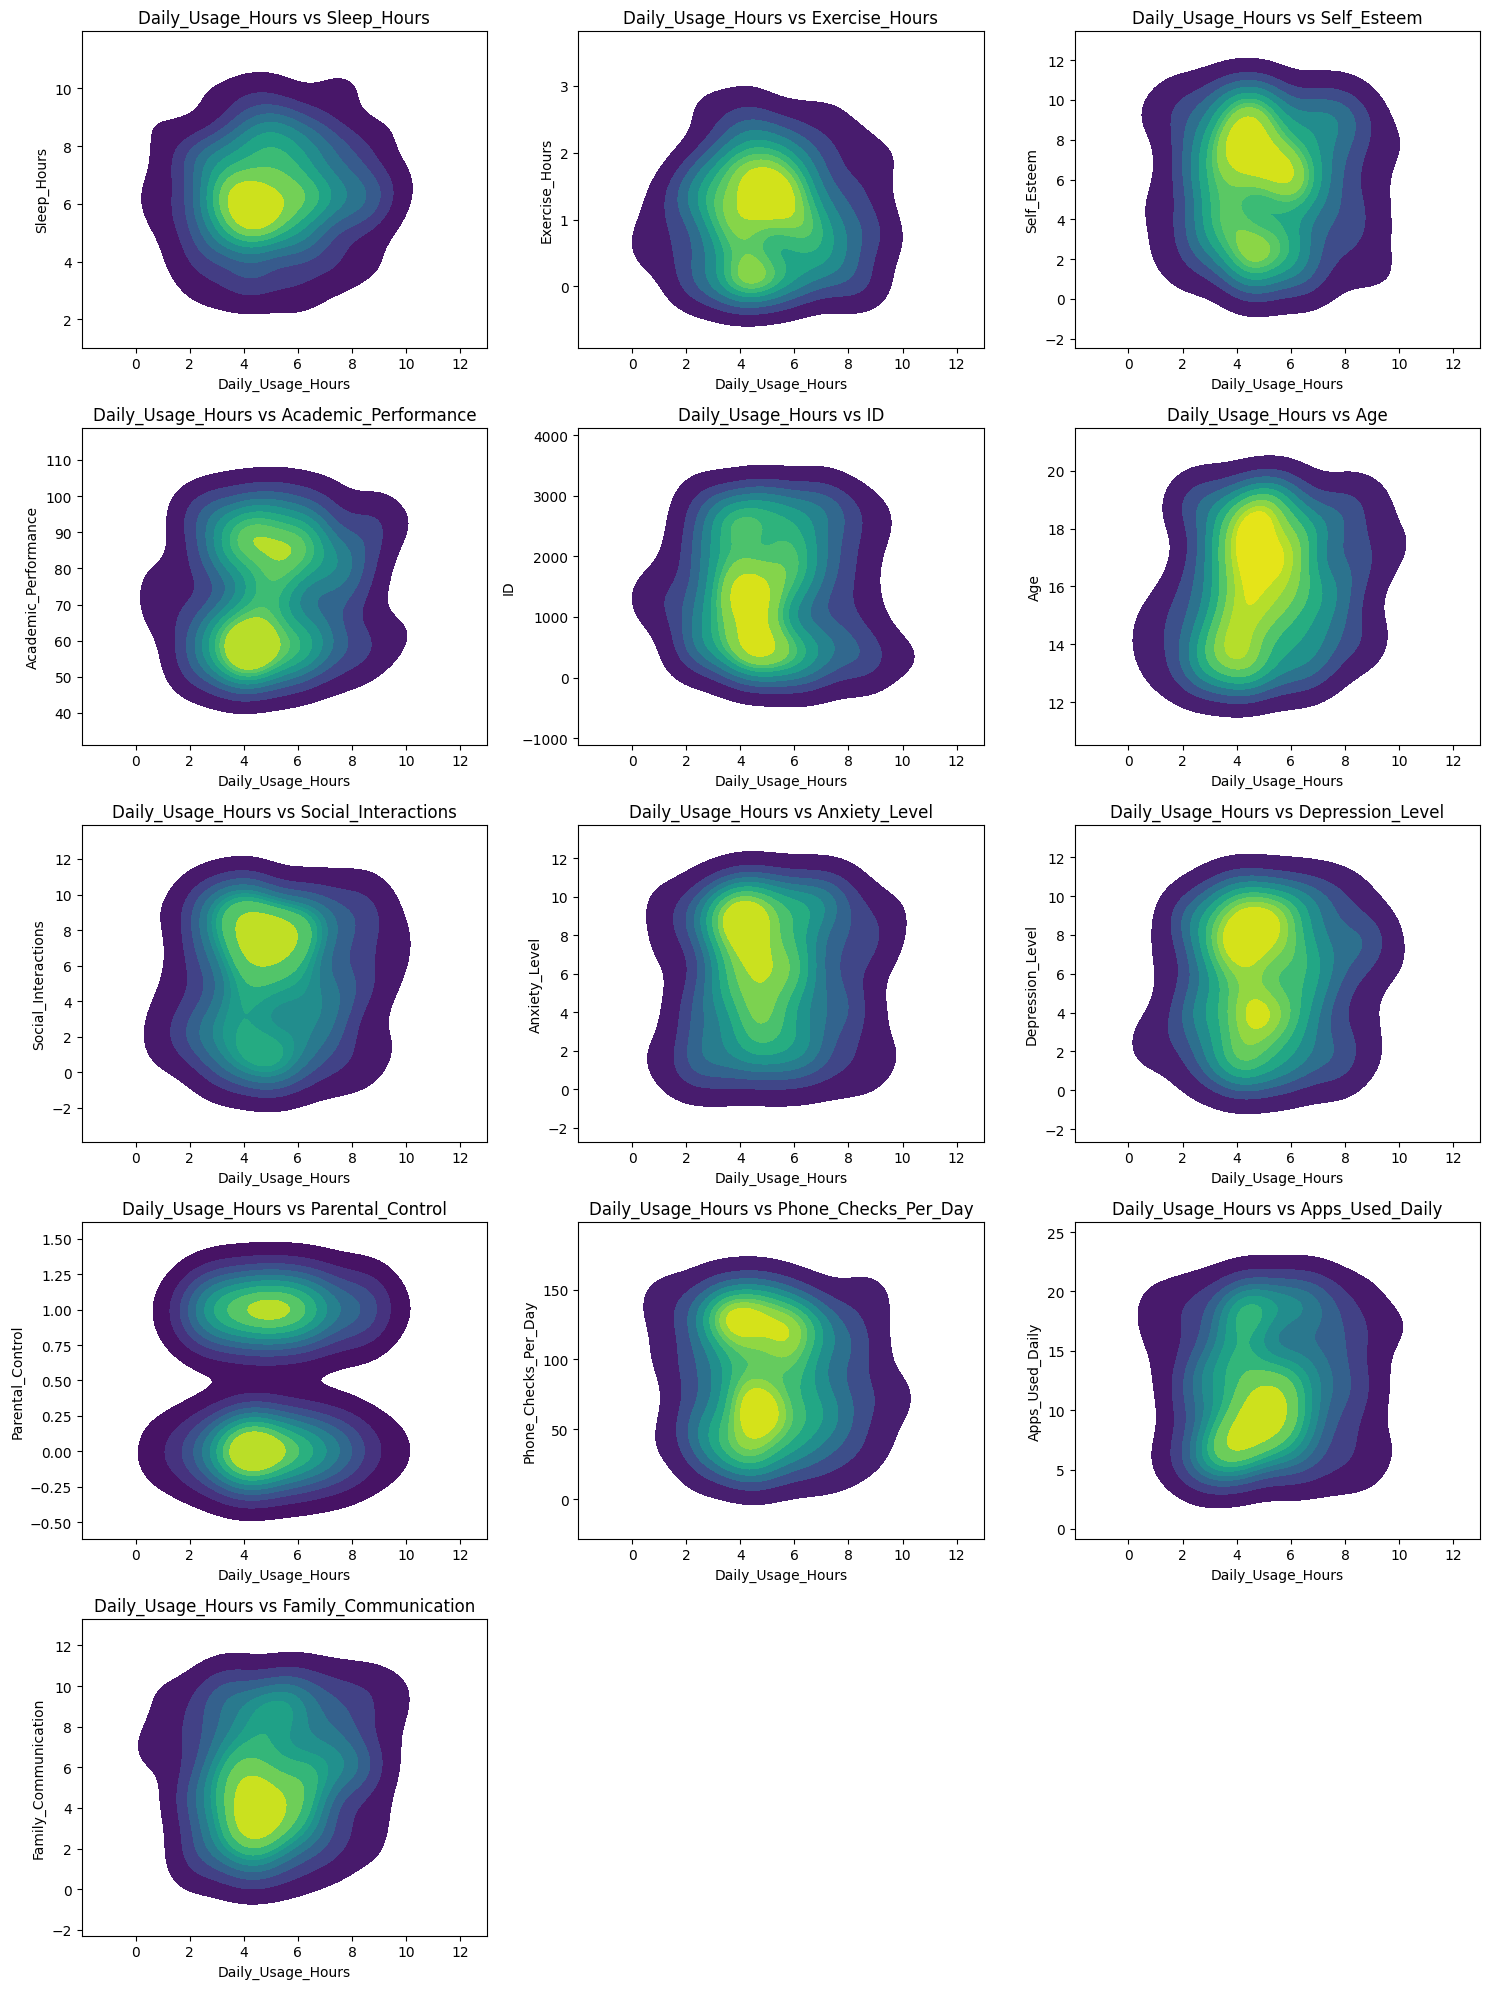

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base variable and target variables
base_var = 'Daily_Usage_Hours'
targets = [v for v in all_continuous if v != base_var]

# Grid layout
n_targets = len(targets)
n_cols = 3
n_rows = (n_targets + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

axes = axes.flatten()

for idx, target_var in enumerate(targets):
    ax = axes[idx]
    x = df_sampled[base_var]
    y = df_sampled[target_var]

    # Plot contour
    sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='viridis',
        ax=ax
    )

    ax.set_xlabel(base_var)
    ax.set_ylabel(target_var)
    ax.set_title(f'{base_var} vs {target_var}')

# Turn off unused subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 📊 Model: ASH Bivariate Countour Maps (Interpretation)

**This section marks a major conceptual leap in the analysis. Average Shifted Histogram (ASH) techniques are used to estimate joint densities — showing where combinations of two variables (like phone usage and sleep) are most common. In this context, it lets us see which combinations of behaviors define the “typical” teen experience and which are outliers. The contour maps flatten the story for easier reading. Together, they paint a nuanced picture of how two behaviors (e.g., phone use and mental health) trade off or reinforce each other.**

1️⃣ **Daily Usage vs Sleep Hours:** Highest density is at moderate daily usage ($\tilde 4–6$ hours) and sleep ($\tilde 6–8$ hours). Implies heavy users tend to sleep less, but moderate users maintain healthy sleep.

2️⃣ **Daily Usage vs Exercise Hours:** Peak density at low exercise regardless of daily usage. Suggests teenagers rarely exercise much, regardless of phone use.

3️⃣ **Daily Usage vs Self-Esteem:** Moderate daily usage associated with higher self-esteem.

Extremely high or very low usage seems correlated with lower self-esteem.

4️⃣ **Daily Usage vs Academic Performance:** Moderate usage correlates with mid-to-high academic performance. High daily usage shows no strong density peak at high performance — possibly negative impact.

5️⃣ **Daily Usage vs ID:** This is likely noise, as ID is just an identifier — no meaningful pattern here.

6️⃣ **Daily Usage vs Age:** Density clusters around certain ages (likely the most common group in the dataset), but no clear age-daily usage trend.

7️⃣ **Daily Usage vs Social Interactions:** Moderate usage correlates with moderate-to-high social interaction scores. Very high usage doesn’t necessarily improve social connections.

8️⃣ **Daily Usage vs Anxiety Level:** Moderate usage associates with low-to-moderate anxiety. Very high usage may increase anxiety slightly, but density is low there.

9️⃣ **Daily Usage vs Depression Level:** Low depression levels correspond to moderate daily usage. High usage shows weak density at higher depression.

🔟 **Daily Usage vs Parental Control:** Peaks at moderate-to-high parental control and moderate phone usage. Suggests teens with more oversight still use phones moderately.

1️⃣1️⃣ **Daily Usage vs Phone Checks Per Day:** As expected, higher daily usage correlates with more frequent phone checks — clear linear density ridge.

1️⃣2️⃣ **Daily Usage vs Apps Used Daily:** More apps used daily correlates with higher daily usage — but density remains centered at moderate levels.

1️⃣3️⃣ **Daily Usage vs Family Communication:** Moderate usage aligns with moderate-to-high family communication. Heavy usage may erode family interaction slightly.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

X_scaled = StandardScaler().fit_transform(df_sampled[all_continuous])
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var_ratio = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var_ratio)

In [45]:
pca_summary = pd.DataFrame({
    "Component": range(1, len(explained_var_ratio)+1),
    "Explained Variance Ratio": explained_var_ratio,
    "Cumulative Explained Variance": explained_var_cumsum
})

# Display with nicer formatting
pca_summary["Explained Variance Ratio"] = (pca_summary["Explained Variance Ratio"]*100).round(2)
pca_summary["Cumulative Explained Variance"] = (pca_summary["Cumulative Explained Variance"]*100).round(2)

pca_summary

,Component,Explained Variance Ratio,Cumulative Explained Variance
0,1,12.03,12.03
1,2,9.09,21.12
2,3,8.85,29.97
3,4,8.24,38.21
4,5,7.60,45.81
5,6,7.37,53.18
6,7,7.18,60.36
7,8,6.89,67.25
8,9,6.21,73.46
9,10,5.88,79.34


**The PCA summary table distills the dimensionality of our dataset into a ranked list of components and their contribution to explaining variance. In plain terms, it tells us how much of the story can be told using just a few themes instead of all 14 variables. We discover that much of the variability can be summarized in just 5–6 principal components, suggesting that teenage phone behavior and outcomes are driven by a handful of underlying factors.**

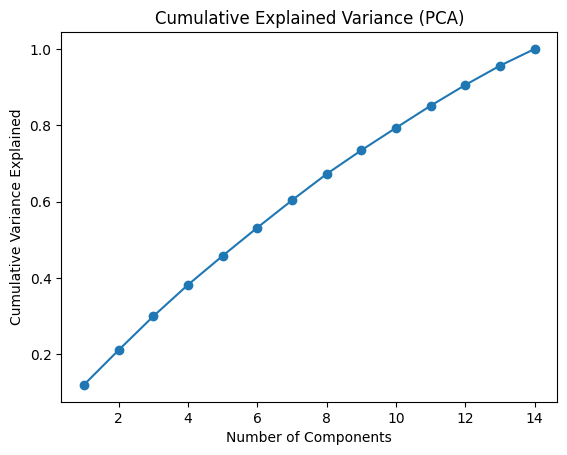

In [46]:
# PCA (Visual Representation)
X_scaled = StandardScaler().fit_transform(df_sampled[all_continuous])
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

**This cell likely plots the PCA biplot or scree plot. Its contribution to the narrative is to show the tradeoff between simplicity and completeness: how many components do we really need before we lose sight of meaningful variation? The implication is clear — we can reduce the complexity of our models while still preserving most of the insight.**

**If we remove at most 3 least concerning features, we would till have 10 features with at least 85% explained variance**

In [47]:
loadings = pd.DataFrame(
    np.abs(pca.components_.T),
    columns=[f'PC{i+1}' for i in range(len(all_continuous))],
    index=all_continuous
)

# Sum contributions across first few PCs (e.g., enough to explain ~80–90% variance)
cumulative_threshold = 0.9
num_components = np.argmax(explained_var_cumsum >= cumulative_threshold) + 1

influence = loadings.iloc[:, :num_components].sum(axis=1).sort_values(ascending=False)

print("\nMost influential features (top 10):")
influence.head(10)


Most influential features (top 10):


,0
Anxiety_Level,3.016110
Exercise_Hours,2.928401
Age,2.895190
Academic_Performance,2.848631
Phone_Checks_Per_Day,2.836156
Parental_Control,2.814837
ID,2.805064
Family_Communication,2.676056
Daily_Usage_Hours,2.666476
Depression_Level,2.617220


**Here, we pinpoint which specific variables contribute most to the main principal components — in other words, which behaviors and outcomes are most characteristic of teenage phone use patterns. Features like `Daily_Usage_Hours`, `Sleep_Hours`, and `Self_Esteem` likely dominate, underscoring their centrality to the story.**

/tmp/ipython-input-48-3900171393.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Group'] = age_cat  # force a "dummy" class
/tmp/ipython-input-48-3900171393.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Group'] = age_cat  # force a "dummy" class
/tmp/ipython-input-48-3900171393.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

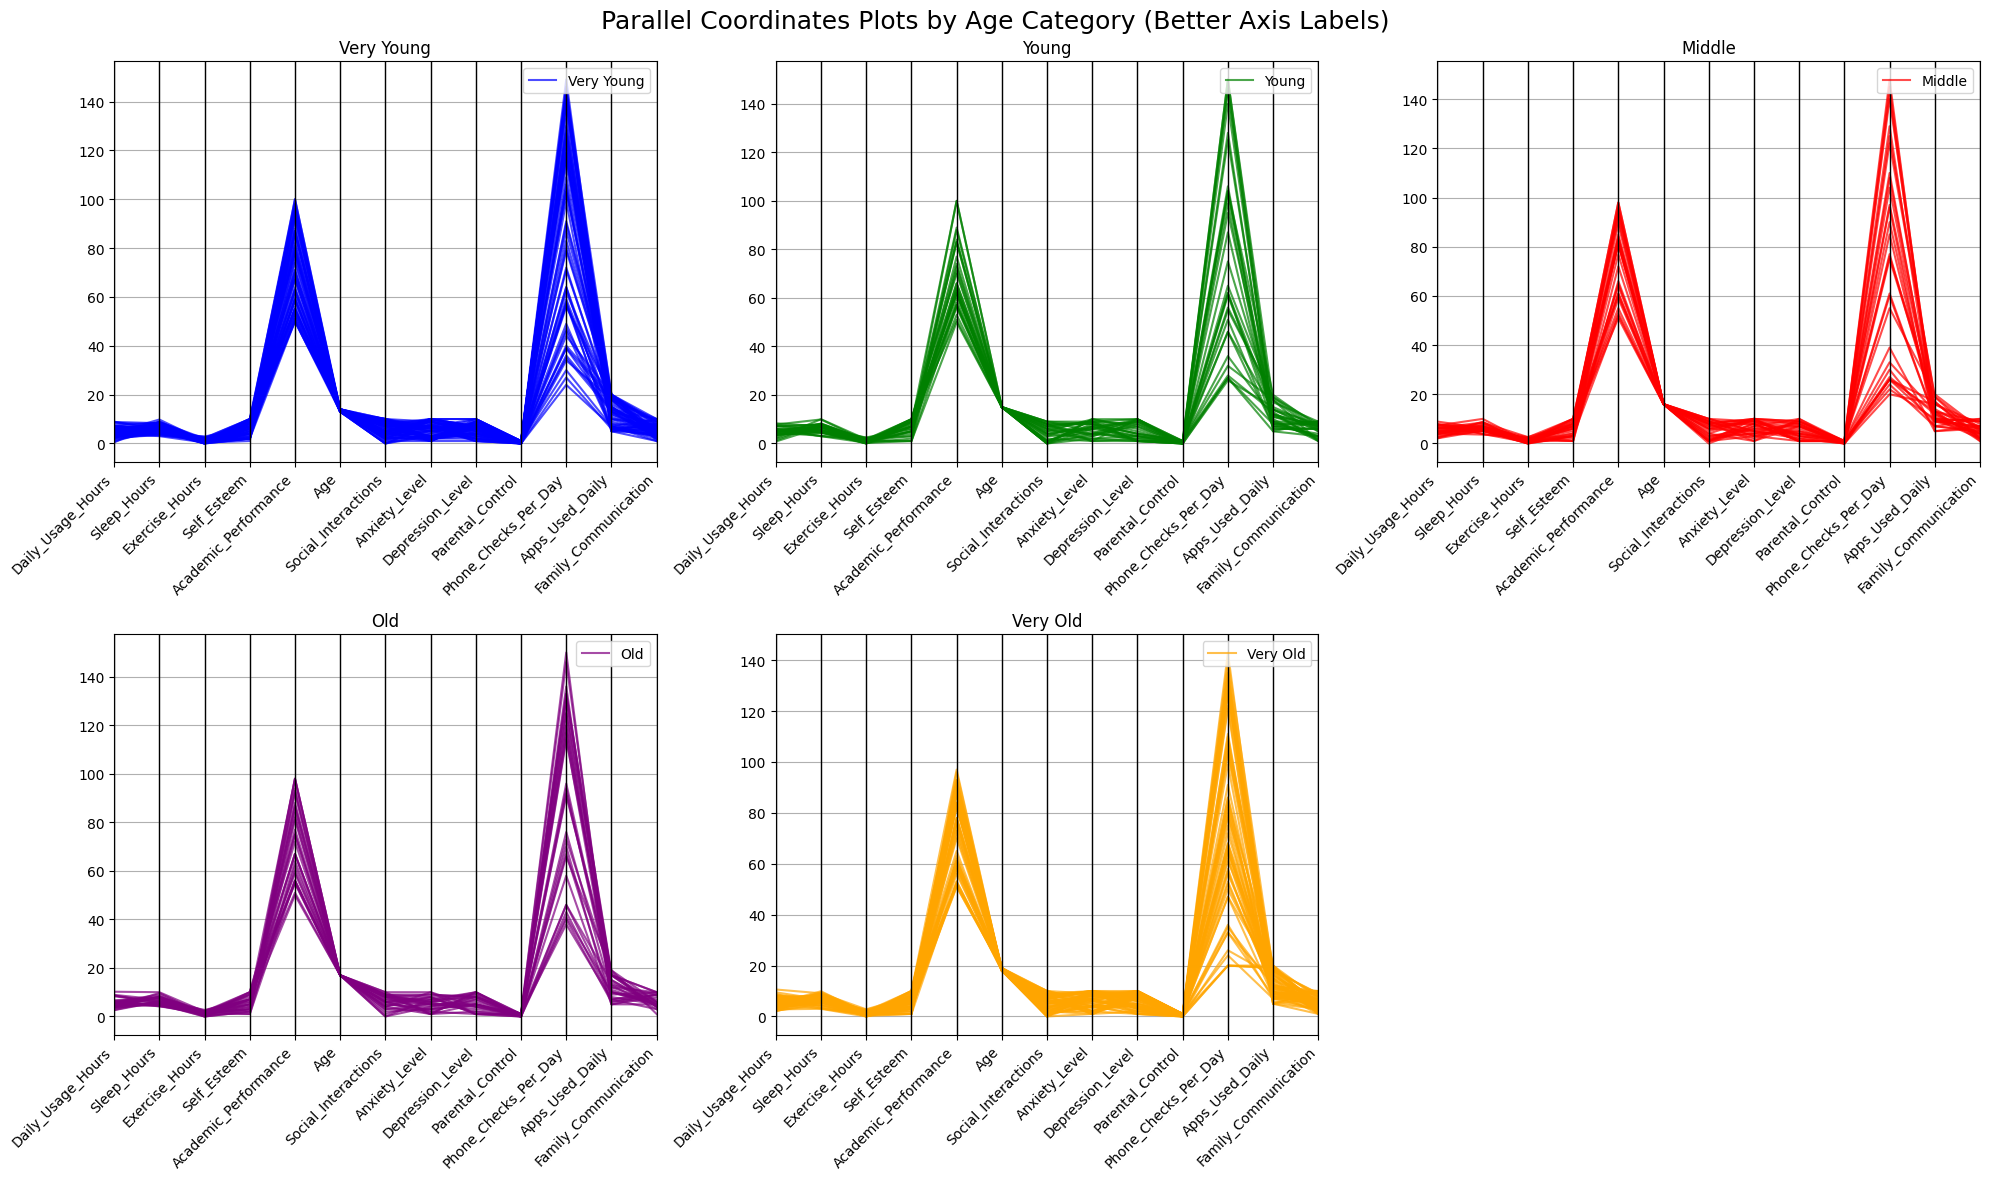

In [48]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Clean continuous columns
all_continuous_clean = [col for col in all_continuous if col != 'ID']

# Add Age_Category
plot_df = df_sampled.copy()
plot_df['Age_Category'] = pd.cut(
    plot_df['Age'],
    bins=5,
    labels=['Very Young', 'Young', 'Middle', 'Old', 'Very Old']
)

# Unique age categories
age_categories = plot_df['Age_Category'].cat.categories

# Distinct colors per group
group_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Grid setup
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

for idx, (age_cat, color) in enumerate(zip(age_categories, group_colors)):
    subset_df = plot_df[plot_df['Age_Category'] == age_cat]
    if not subset_df.empty:
        # Parallel coordinates needs at least two classes to show color variation — workaround: assign dummy
        subset_df['Group'] = age_cat  # force a "dummy" class

        parallel_coordinates(
            subset_df[['Group'] + all_continuous_clean],
            class_column='Group',
            color=[color],
            ax=axes[idx],
            alpha=0.7
        )
        axes[idx].set_title(f"{age_cat}")
        axes[idx].tick_params(axis='x', rotation=45, labelsize=10)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), ha='right')
    else:
        axes[idx].set_visible(False)

# Hide unused subplots
for j in range(len(age_categories), len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Parallel Coordinates Plots by Age Category (Better Axis Labels)", fontsize=18)
plt.tight_layout()
plt.show()

<h3>Regardless of Teenager's Age, the clusters follows consistent features</h3>
<hr>

This parallel coordinates plot shows how patterns of multiple features differ across age categories. **We see that Phone_Checks_Per_Day and Apps_Used_Daily remain consistently high across all age groups, suggesting these behaviors are common regardless of age. In contrast, features like Sleep_Hours, Self_Esteem, and Academic_Performance display more variability between age groups, indicating these outcomes may shift as teens grow older.**

Overall, phone engagement metrics seem stable, while well-being and lifestyle factors fluctuate more with age.